# Data analisys on Covid-19 

Is common understanding that the _official positive cases_ are an underestimation of the real infected population, here we are trying a different approach in order to have a more precise reppresentation of the evolution.
Considering just the hospedalized portion of the infected population can be a more valid numer to work on.

In order to try this approach we are using the data provided by: [github repository](git@github.com:pcm-dpc/COVID-19.git) that need to be cloned within this folder.

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
from scipy import optimize
import ipywidgets as widgets

pd.set_option('mode.chained_assignment', None)
pyplot.rcParams.update({'figure.max_open_warning': 22})

filename = "COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv"
data = pd.read_csv(filename)
data['data'] = pd.to_datetime(data['data']).dt.normalize()

display(data.head())

%matplotlib inline

data stato  codice_regione denominazione_regione        lat  \
0 2020-02-24   ITA              13               Abruzzo  42.351222   
1 2020-02-24   ITA              17            Basilicata  40.639471   
2 2020-02-24   ITA               4          P.A. Bolzano  46.499335   
3 2020-02-24   ITA              18              Calabria  38.905976   
4 2020-02-24   ITA              15              Campania  40.839566   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  11.356624                       0                  0                     0   
3  16.594402                       0                  0                     0   
4  14.250850                       0                  0                     0   

   isolamento_domiciliare  totale_positivi  variazione_totale_positivi  \
0                       0                0                           0   
1                       0                0                           0   
2                       0                0                           0   
3                       0                0                           0   
4                       0                0                           0   

   nuovi_positivi  dimessi_guariti  deceduti  totale_casi  tamponi  \
0               0                0         0            0        5   
1               0                0         0            0        0   
2               0                0         0            0        1   
3               0                0         0            0        1   
4               0                0         0            0       10   

   casi_testati note_it note_en  
0           NaN     NaN     NaN  
1           NaN     NaN     NaN  
2           NaN     NaN     NaN  
3           NaN     NaN     NaN  
4           NaN     NaN     NaN

The precomputated field useful for this experiment are loaded with the relevant one in the new dataset.
We need precomputate the value of **totale_accertati** been this the base of this experiment and calculated as shown below, with the idea to rappresent the total of people that have somehow passed through hospitalization in any form and with any kind of result.



In [2]:

df_italy = pd.DataFrame(data['data'])


df_italy['data'] = data['data']
df_italy['denominazione_regione'] = data['denominazione_regione']
df_italy['ricoverati_con_sintomi'] = data['ricoverati_con_sintomi']
df_italy['terapia_intensiva'] = data['terapia_intensiva']
df_italy['totale_positivi'] = data['totale_casi']
df_italy['dimessi_guariti'] = data['dimessi_guariti']
df_italy['deceduti'] = data['deceduti']
df_italy = df_italy.sort_values(by=['data'])

regions = df_italy['denominazione_regione'].unique()

display(df_italy.head())

data denominazione_regione  ricoverati_con_sintomi  \
0  2020-02-24               Abruzzo                       0   
20 2020-02-24                Veneto                      12   
19 2020-02-24         Valle d'Aosta                       0   
18 2020-02-24                Umbria                       0   
17 2020-02-24           P.A. Trento                       0   

    terapia_intensiva  totale_positivi  dimessi_guariti  deceduti  
0                   0                0                0         0  
20                  4               33                0         1  
19                  0                0                0         0  
18                  0                0                0         0  
17                  0                0                0         0

Not having the real number of people that get out of the hospital we need to make a estimation about it.

In this section we will try to get a valid estimation of this two dimensions:

* _guariti_ospedalizzati_ as the proportional value for _dimessi_guariti_
* _morti_ospdedalizzati_ as the proportional value for _deceduti_

In [3]:
ratio_hospitalized = (data['totale_ospedalizzati'] / data['totale_positivi']).fillna(0)
df_italy['guariti_ospedalizzati'] = np.multiply(data['dimessi_guariti'], ratio_hospitalized)
df_italy['morti_ospedalizzati'] = data['deceduti'] * ([0.8]*len(data['deceduti'])) ## considering 80%
df_italy['ratio'] = ratio_hospitalized
for r in regions: ## make it strictly growing series
    tmp = df_italy[df_italy['denominazione_regione']==r]['guariti_ospedalizzati']
    y = tmp.diff().fillna(0)
    y[y<0] = 0
    y2 = y.cumsum()
    df_italy.loc[df_italy['denominazione_regione']==r, 'guariti_ospedalizzati'] = y2

Show the trend for this dimension in order to undestand if them can be considered valid, a mandatory requirement is that this numbers, as cumulative value, are strictly growing.
In the next graphs deltas are shown in order to evaluate the growing factor

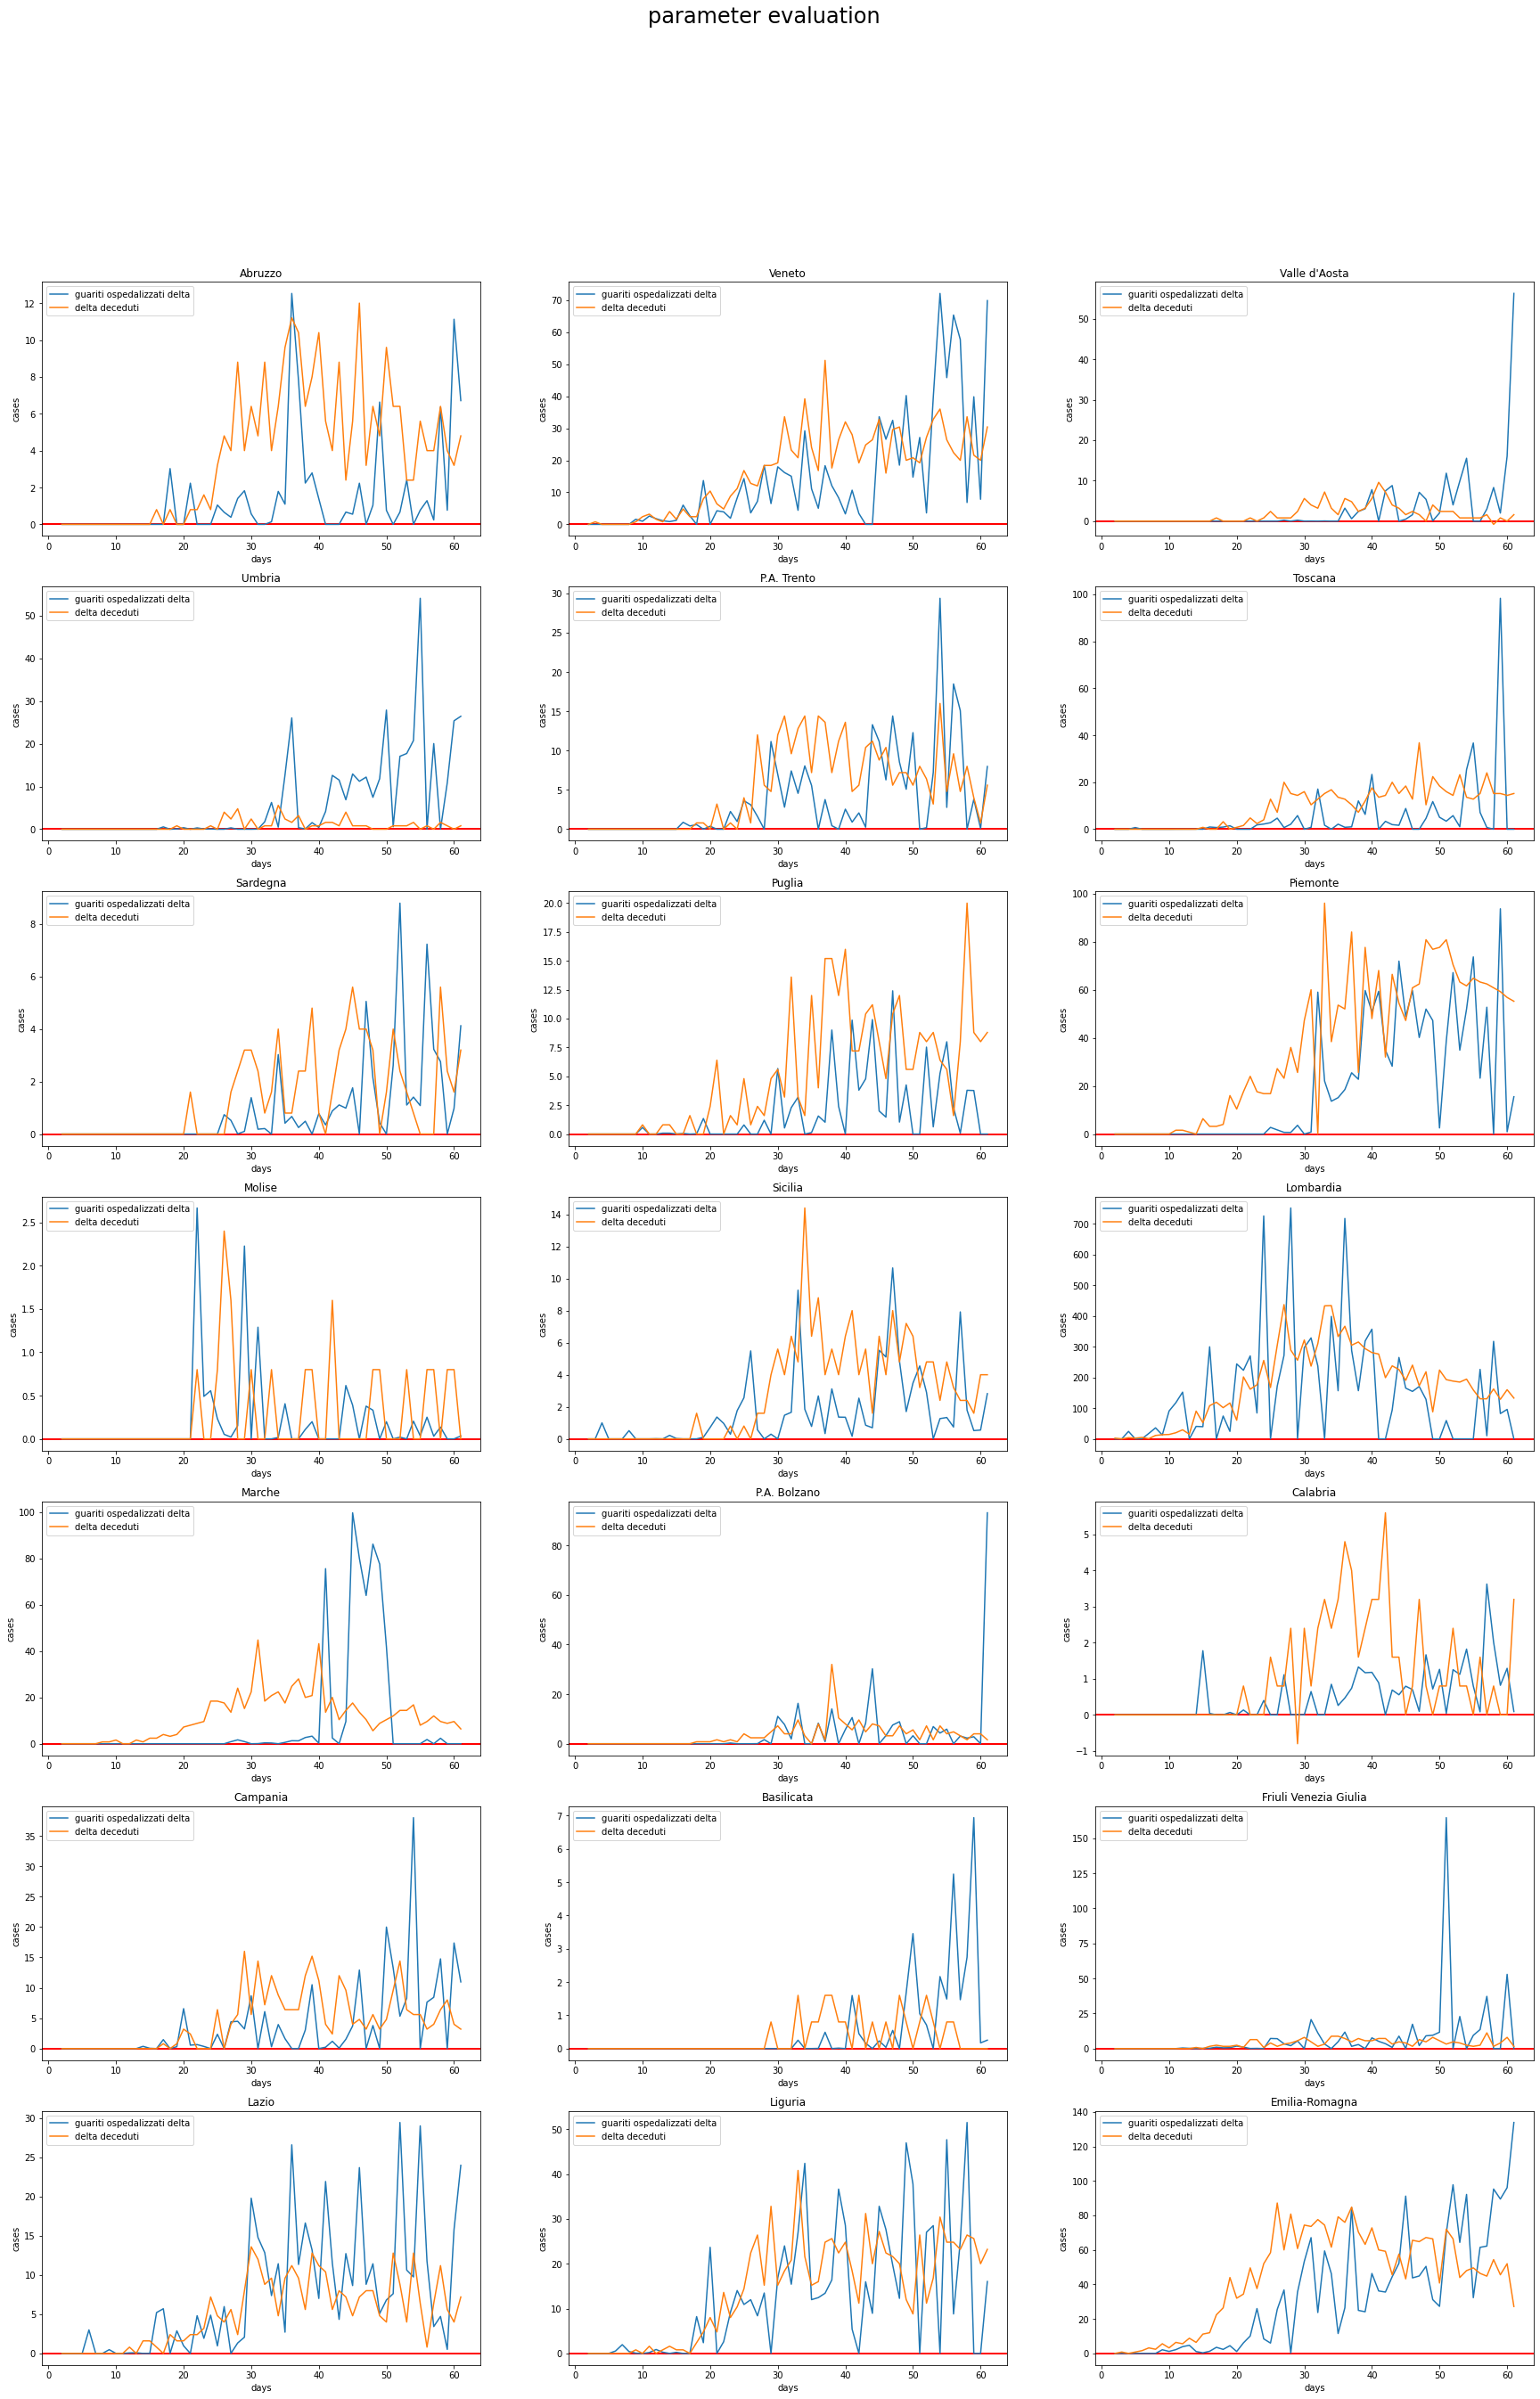

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

<Figure size 936x576 with 0 Axes>

In [4]:
f = pyplot.figure(figsize=[30.0,43.0])
pyplot.suptitle('parameter evaluation', fontsize=24)
rows = 7
columns = 3
index = 1
for r in regions:
    px = f.add_subplot(rows,columns, index)
    region = df_italy[df_italy['denominazione_regione']==r]
    region.drop_duplicates(subset='data',inplace=True)
    region['day'] = range(1,len(region)+1)
    x = region['day'].tolist()
    y = region['guariti_ospedalizzati'].diff()
    y1 = region['morti_ospedalizzati'].diff()
    fig = pyplot.figure(figsize=[13.0,8.0])
    px.set_title(r)
    px.set(xlabel="days", ylabel='cases')
    px.axhline(linewidth=2, color='r')
    px.plot(x,y, label='guariti ospedalizzati delta')
    px.plot(x,y1, label='delta deceduti')
    px.legend(loc='upper left')
    index+=1
  

After this evaluation we are able to define the principal dimension that is:

* _totale_accertati_ as the number of people that are gone through the hospitalization process

In [5]:
valid_cases = data['totale_ospedalizzati'] + df_italy['guariti_ospedalizzati'] + df_italy['morti_ospedalizzati']
df_italy['totali_accertati'] = valid_cases

in order to apply the logistic regression this are the functions needed

In [6]:
def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y
 
def residuals(p,x,y):
    return y - sigmoid(p,x)

def vertline(x, max):
    """Draws a vertical line at x."""
    pyplot.plot([x, x], [0, max], '--' ,linewidth=2, color='0.8')
display(df_italy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1280
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    1281 non-null   datetime64[ns]
 1   denominazione_regione   1281 non-null   object        
 2   ricoverati_con_sintomi  1281 non-null   int64         
 3   terapia_intensiva       1281 non-null   int64         
 4   totale_positivi         1281 non-null   int64         
 5   dimessi_guariti         1281 non-null   int64         
 6   deceduti                1281 non-null   int64         
 7   guariti_ospedalizzati   1281 non-null   float64       
 8   morti_ospedalizzati     1281 non-null   float64       
 9   ratio                   1281 non-null   float64       
 10  totali_accertati        1281 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 160.1+ KB


None

in the following section we well show the trend of the ligistic regression for the last **n** days.

In addition will be highlighted the area made by the sum of:

* intensive care 
* hospitalization

this will show how the regression is fitting the real data, and give you an suggestion of number of subject that get out of the critical phase of the infection.

Another function is provided in order to plot an estimation of the real size of the infection in relation with the official number.
The estimation is builded upon the information that 20% of infected will need hospitalization, this number is not totally confirmed now, so this need to be considered a rough estimation.

The ajustment of the parameter can be seen as variable **ratio** in the code below:

In [7]:
def plot_region(region_name, history=7, pxplot=None):
    if pxplot==None:
        pyplot.figure(figsize=[13.0,8.0])
        pxplot = pyplot.subplot(111)
    final = df_italy.copy()
    if region_name == '*':
        region = final.groupby(final['data'].dt.date).sum()
    else:
        region = final[final['denominazione_regione']==region_name]
        region.drop_duplicates(subset='data',inplace=True)
    region['day'] = range(1,len(region)+1)
    x = region['day'].tolist()
    y = region['totali_accertati'].tolist() #.diff() in order to have deltas
    max = region['totali_accertati'].max()
    y[0] = 0.0
    
    pxplot.set_title('Number of cases that require hospitalization (%s)'%region_name)
    pxplot.set(xlabel='days from the beginning',ylabel='number of cases')
    #pxplot.xlabel('days from the beginning')
    #pxplot.ylabel('number of cases')
    vertline(x[-1], max*1.5)  #today
    pxplot.grid(b=True, color='g')
    pxplot.plot(x,y,'k-', alpha=0.5, label='real data')

    style = [('-.',0.3)]*len(x)
    style[len(x)-1] = ('*-.',0.9)
    for n in range(len(x)-history,len(x)):
        x0 = x[0:n]
        y0 = y[0:n]
        x_f = x0.copy()
        x_f.extend(range(len(x),len(x)+20))
        p, cov, infodict, mesg, ier = optimize.leastsq(residuals,[0,0,0,0],args=(x0,np.array(y0)),full_output=1)
        x1,y1,c,k=p
        pxplot.plot(x_f, (c / (1 + np.exp(-k*((x_f)-x1)))) + y1,style[n][0], alpha=style[n][1], label='logistic regression (day=%d)'%(n+1))

    ### down here all wrong ##### 
    pxplot.plot(x, region['terapia_intensiva'])
    pxplot.fill_between(x, region['terapia_intensiva'], alpha=0.3, hatch='\\\\\\', label='intense care')
    pxplot.plot(x, region['ricoverati_con_sintomi']+region['terapia_intensiva'])
    pxplot.fill_between(x, region['ricoverati_con_sintomi']+region['terapia_intensiva'], alpha=0.3, hatch='///', label='hosplitalized')
    pxplot.legend(loc='upper left')
 

def plot_infection_region(region_name, pxplot=None):
    if pxplot==None:
        pyplot.figure(figsize=[13.0,8.0])
        pxplot = pyplot.subplot(111)
    ratio = 19  ### relevat value 
    scale_factor = 1/(ratio/100)
    final = df_italy.copy()
    if region_name == '*':
        region = final.groupby(final['data'].dt.date).sum()
    else:
        region = final[final['denominazione_regione']==region_name]
        region.drop_duplicates(subset='data',inplace=True)
    region['day'] = range(1,len(region)+1)
    x = region['day'].tolist()
    y = region['totale_positivi'].tolist()
    pxplot.set_title('Estimation of infection vs Identified infection (%s)'%region_name)
    pxplot.set(xlabel='days from the beginning', ylabel='number of cases')
    #pxplot.xlabel('days from the beginning')
    #pxplot.ylabel('number of cases')
    pxplot.grid(b=True, which='major', color='g', linestyle='-')
    pxplot.grid(b=True, which='minor', color='b', linestyle='--')
    pxplot.plot(x,y, label='currently discovered cases')
    pxplot.fill_between(x, y, alpha=0.3, hatch='///')
    x0 = x
    y0 = region['totali_accertati'].tolist()
    p, cov, infodict, mesg, ier = optimize.leastsq(residuals,[0,0,0,0],args=(x0,np.array(y0)),full_output=1)
    x1,y1,c,k=p
    #display(cov, infodict, mesg, ier)
    pxplot.plot(x0, (c / (1 + np.exp(-k*((x0)-x1))) + y1)*scale_factor, label='estimation of infection')
    pxplot.legend(loc='upper left')
    
def plot_interactive(region):
    def p(x):
        plot_region(region, x)
    return widgets.interactive(p, x = widgets.IntSlider(5,1,50,1))

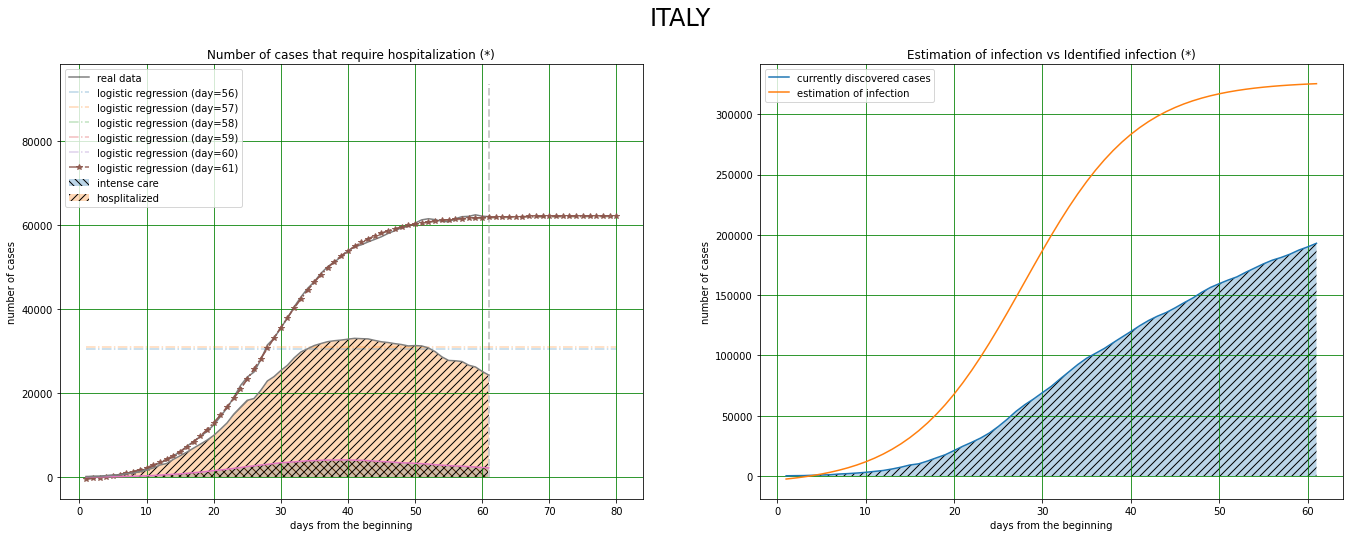

In [8]:
#GLOBAL TREND FOR ITALY
pyplot.figure(figsize=[23.0,8.0])
pyplot.suptitle('ITALY', fontsize=24)
p1plot = pyplot.subplot(121)
plot_region('*', 6, pxplot=p1plot)
p2plot = pyplot.subplot(122)
plot_infection_region('*', pxplot=p2plot)

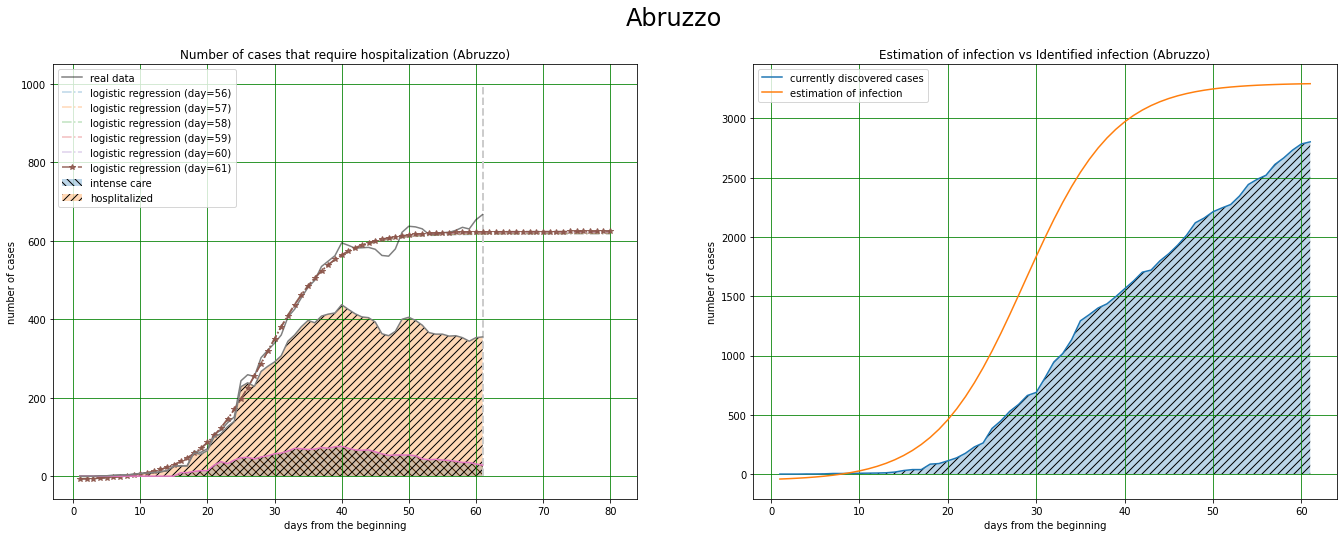

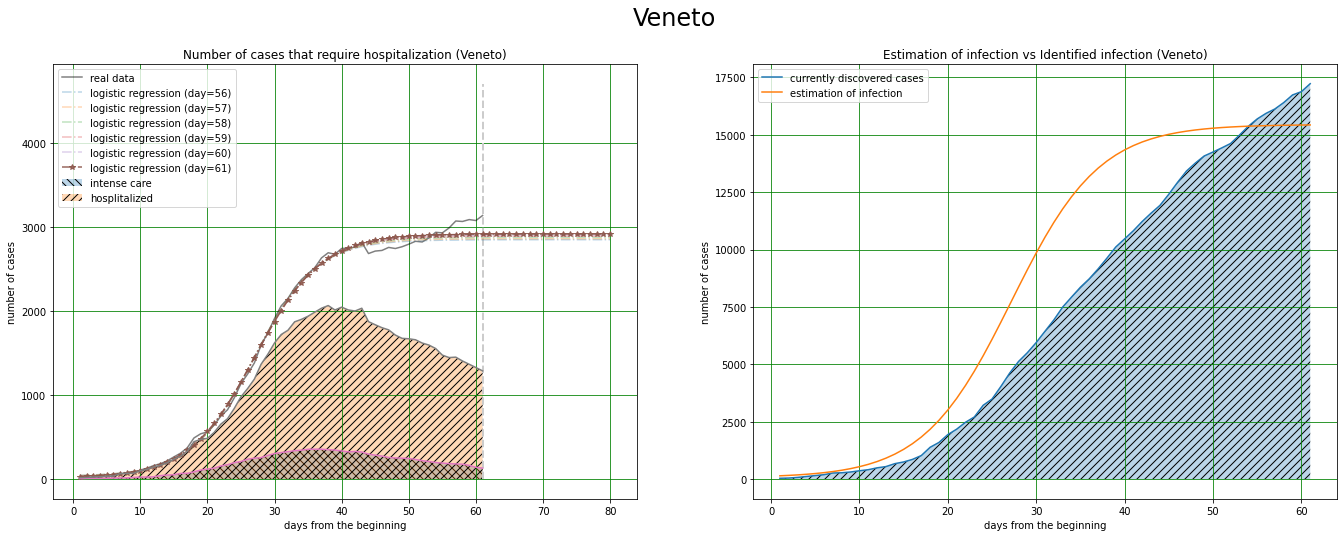

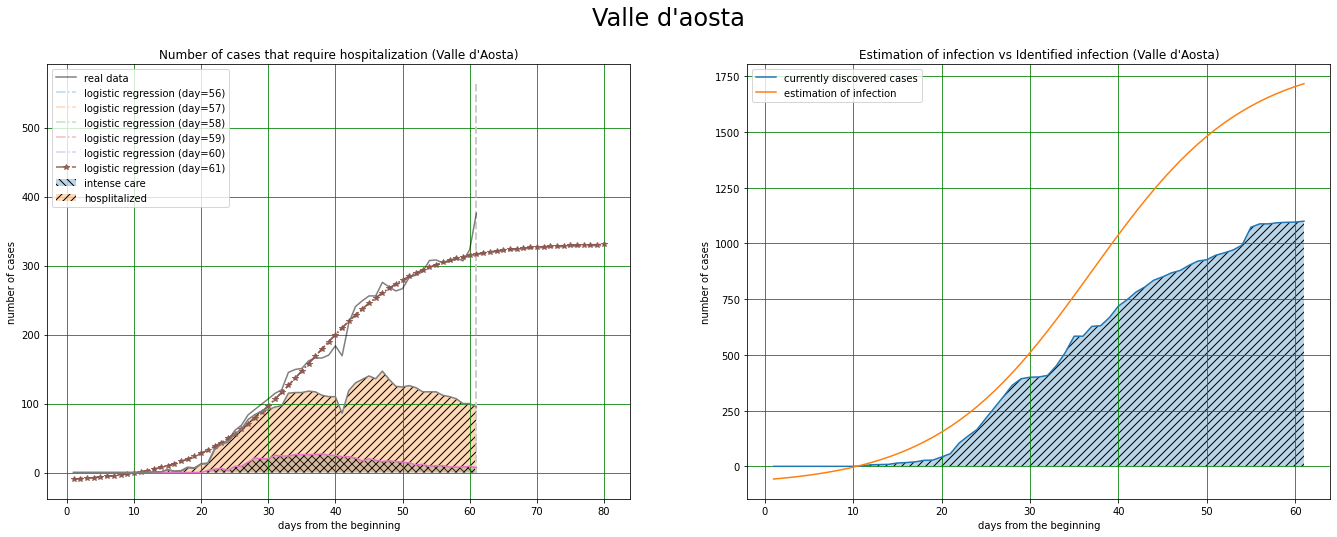

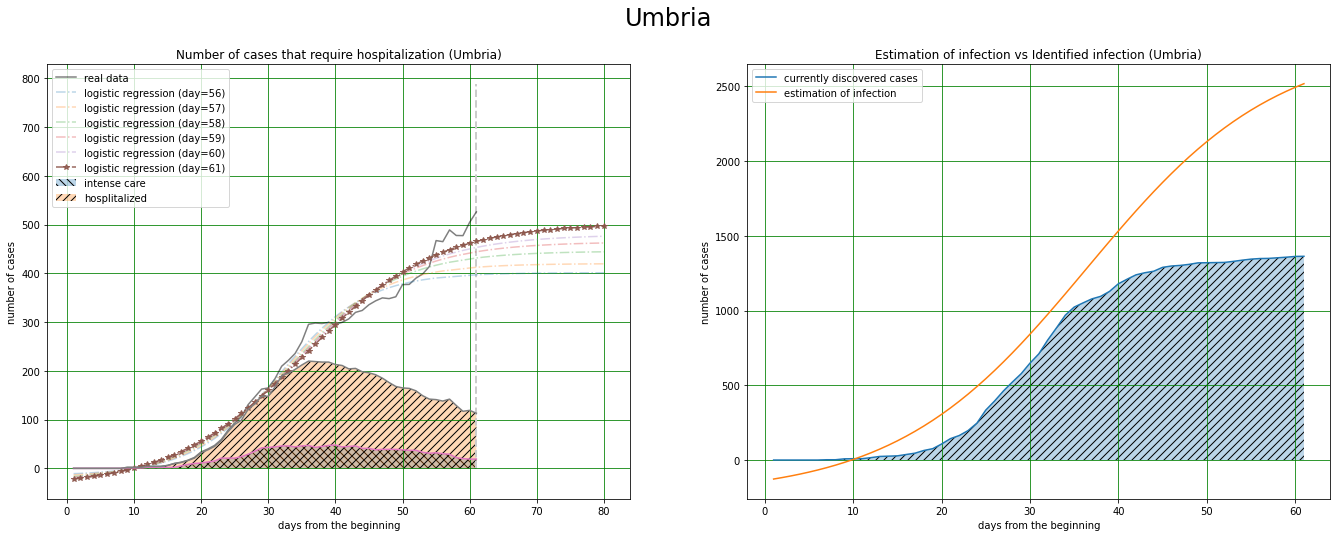

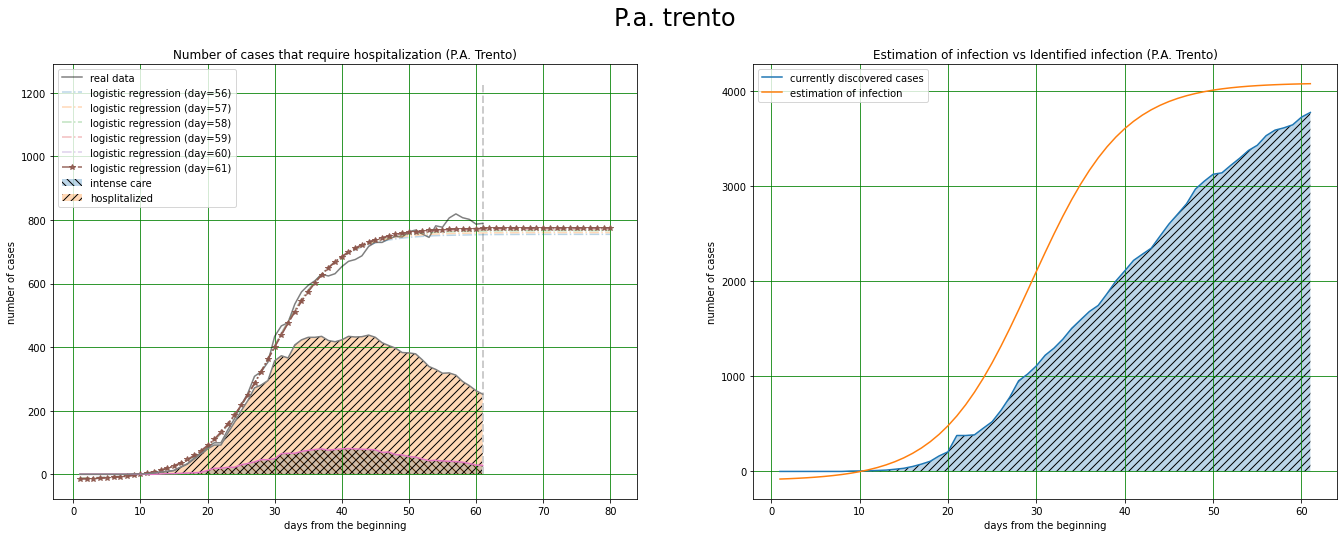

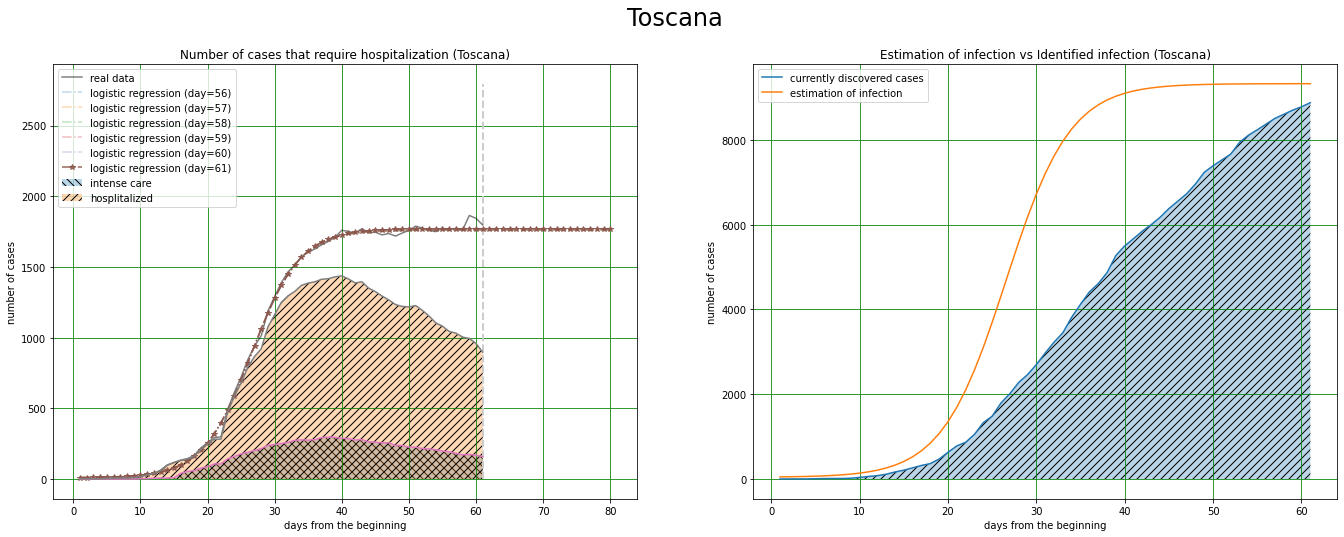

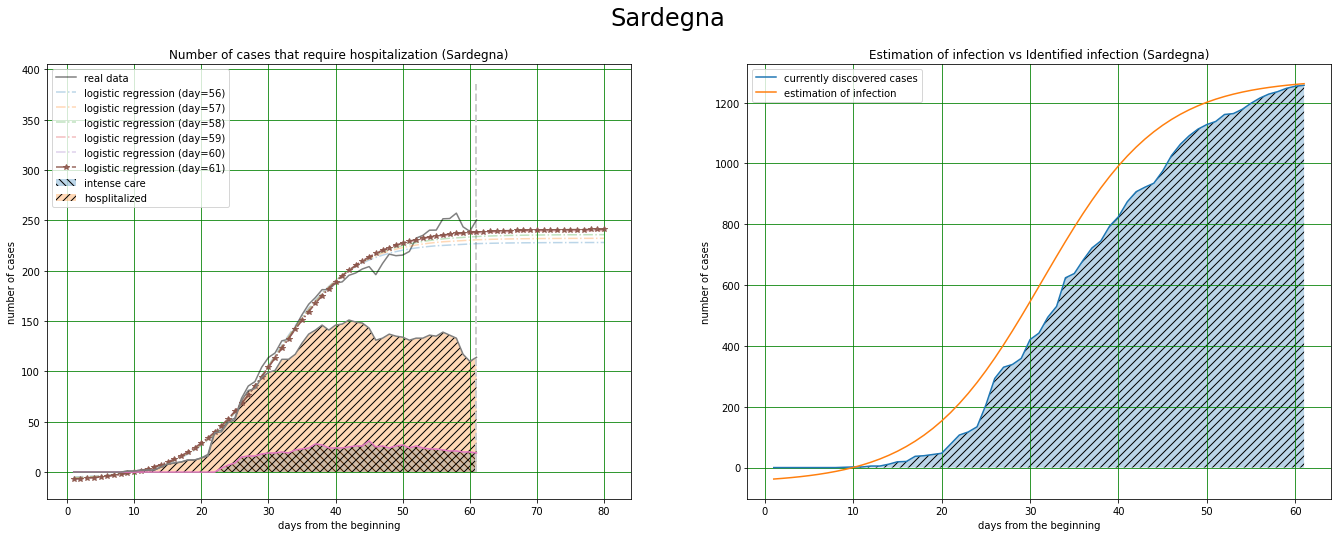

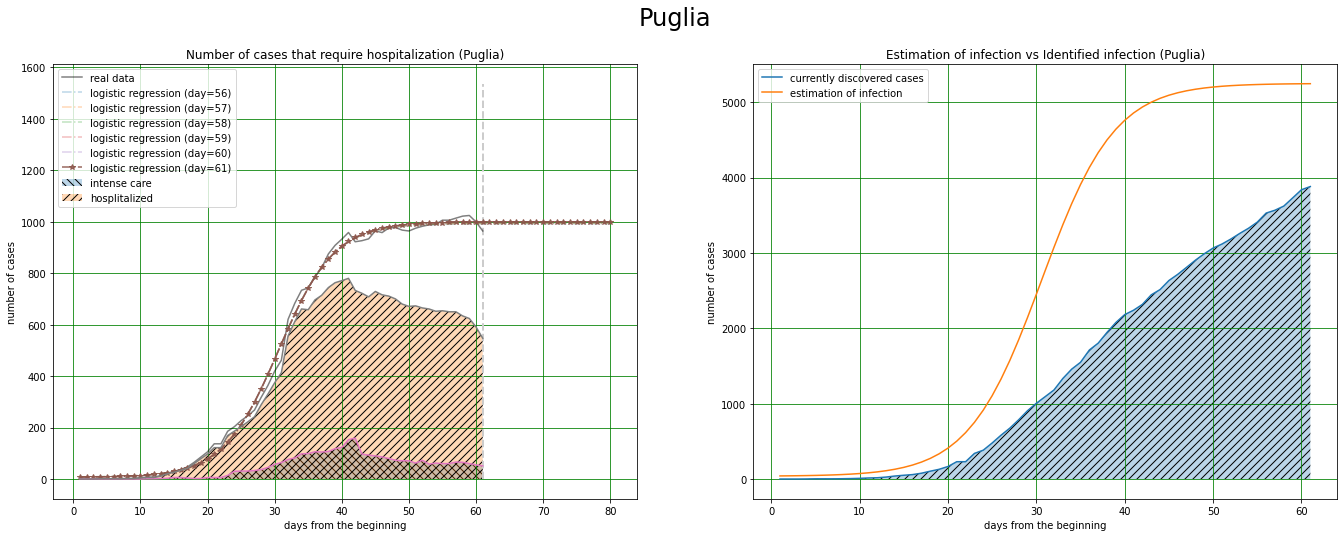

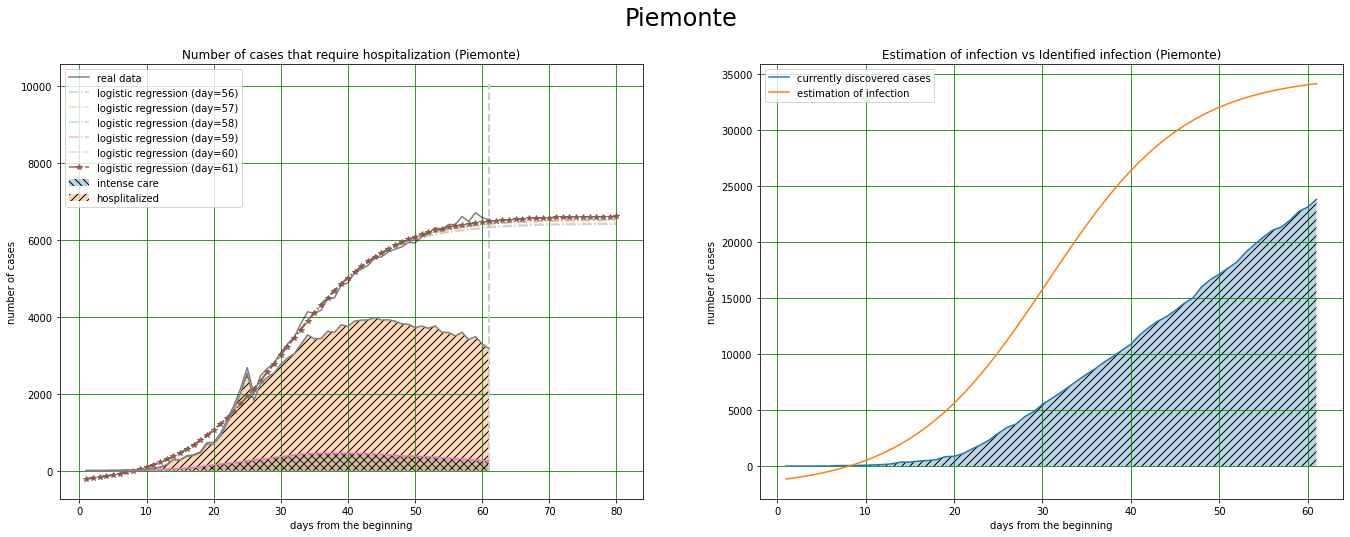

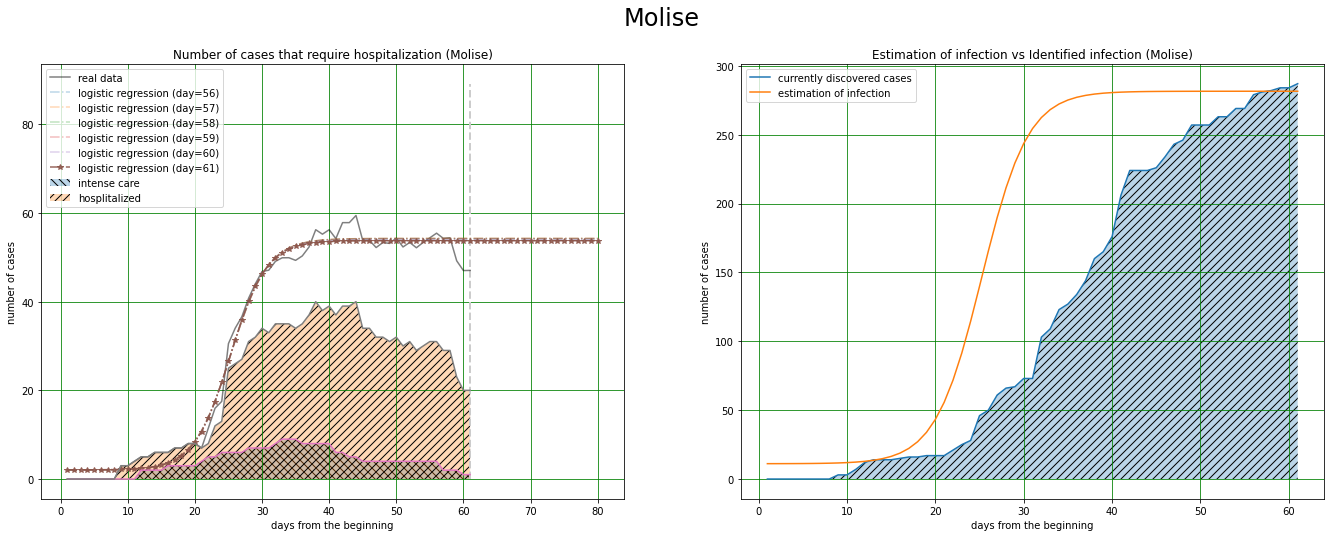

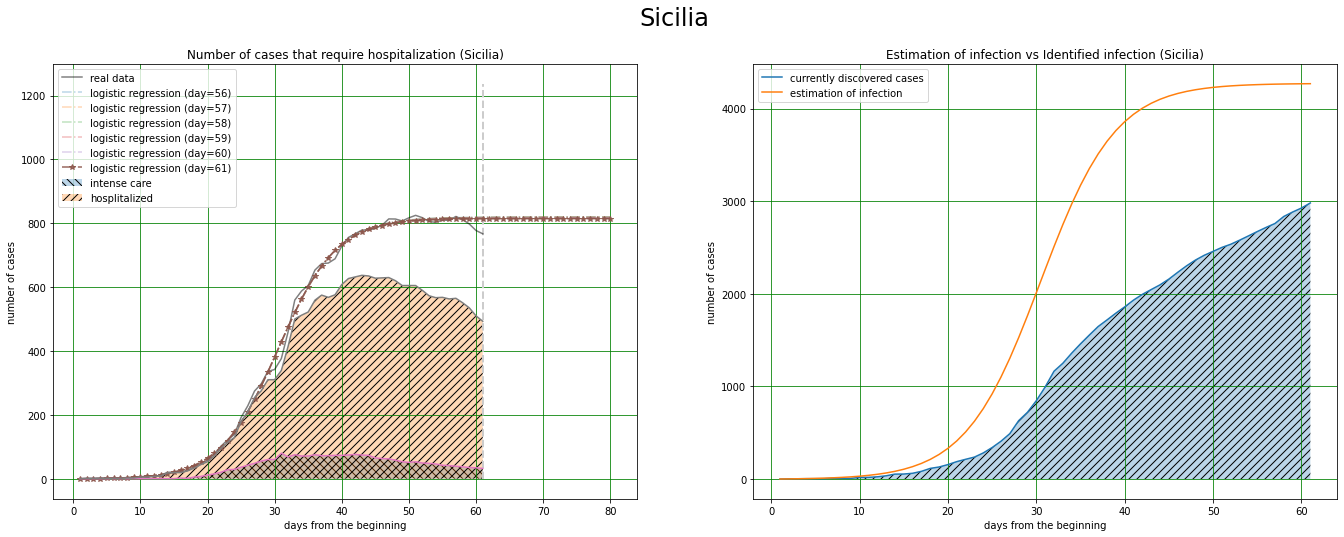

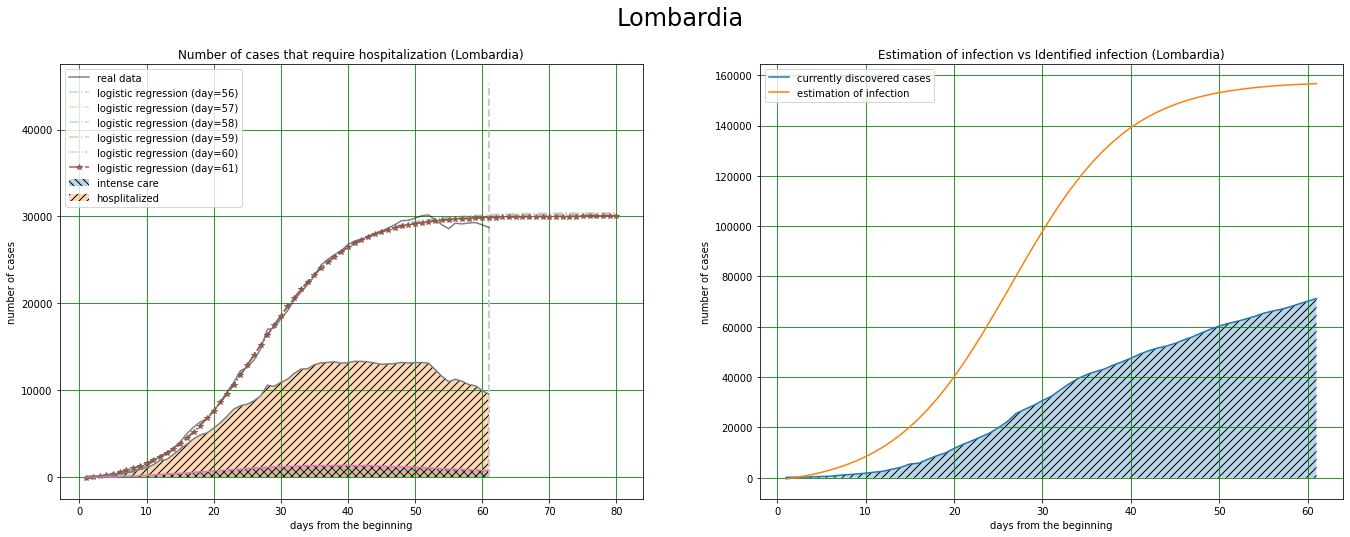

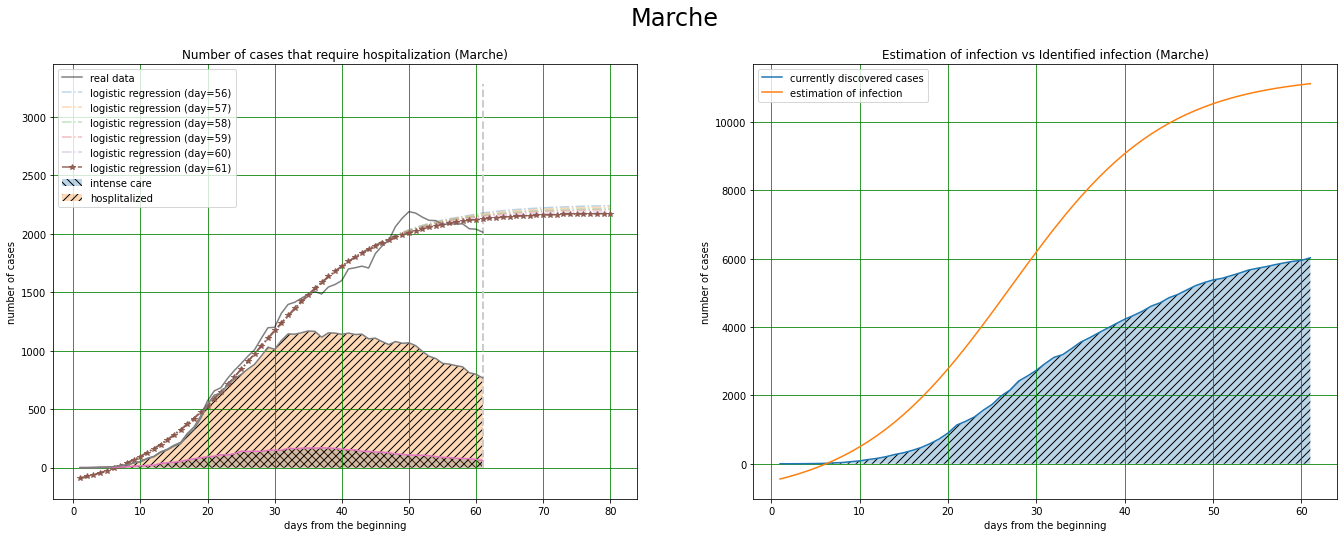

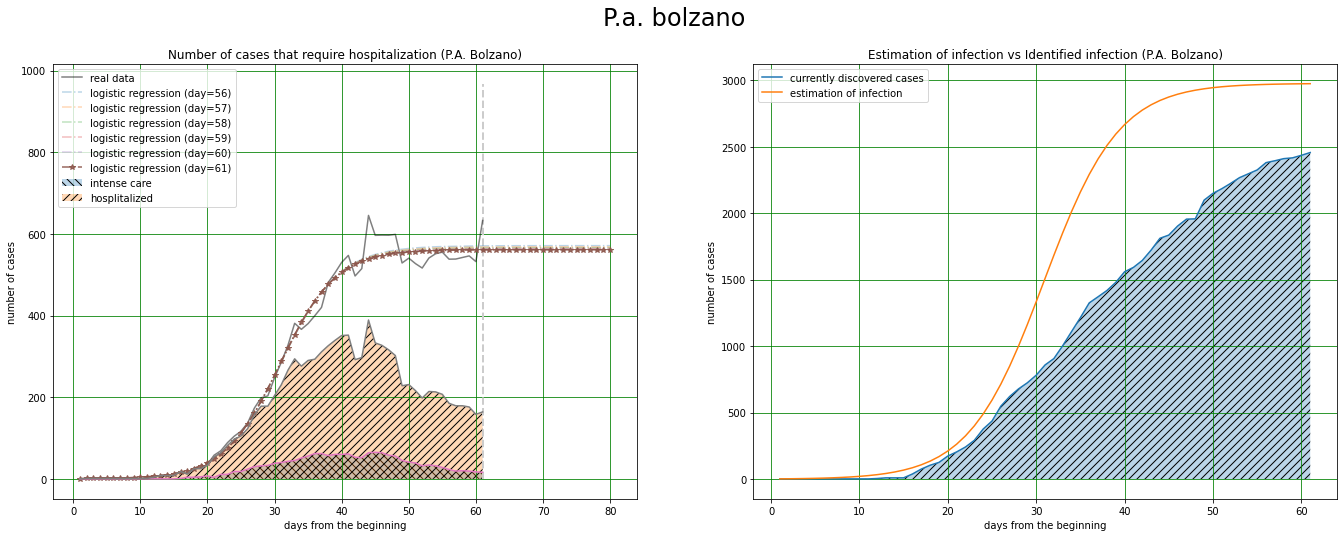

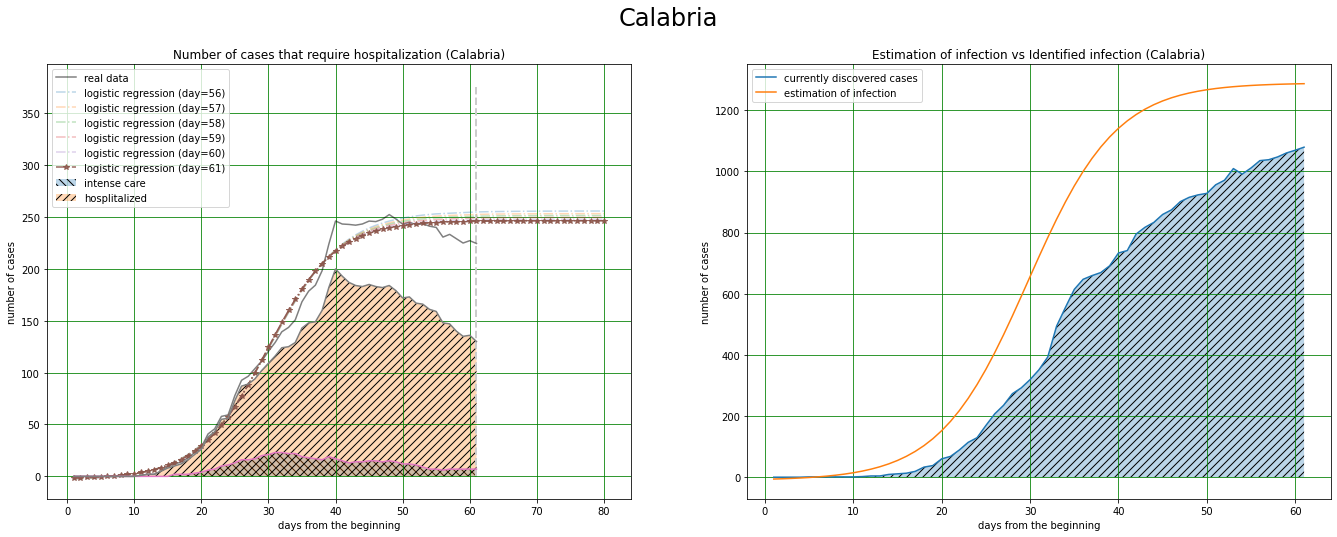

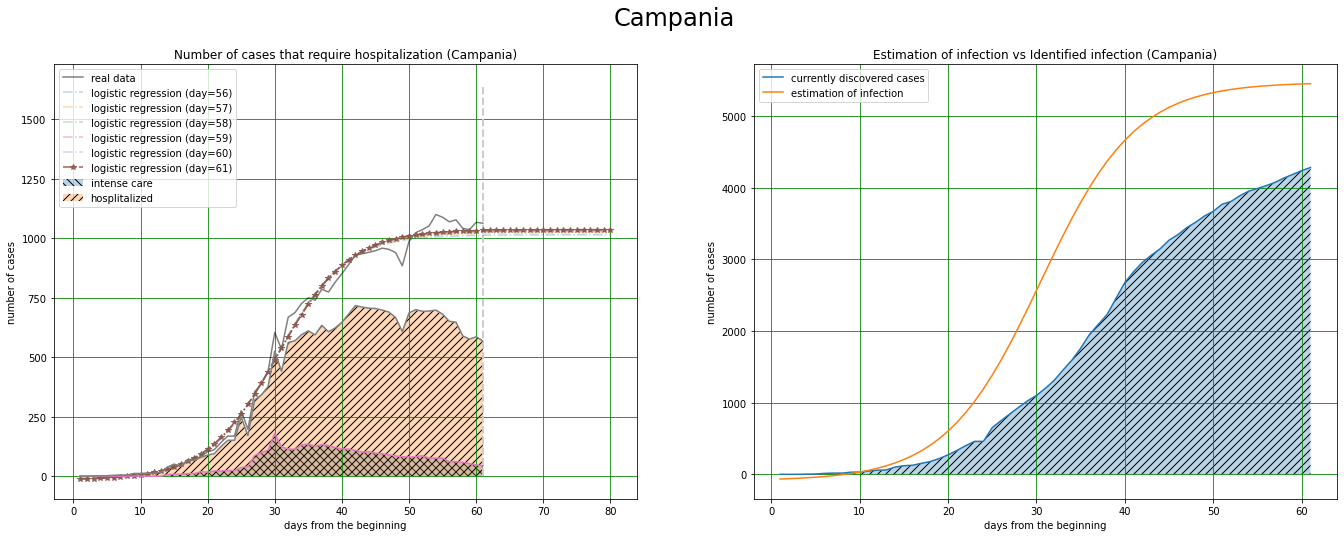

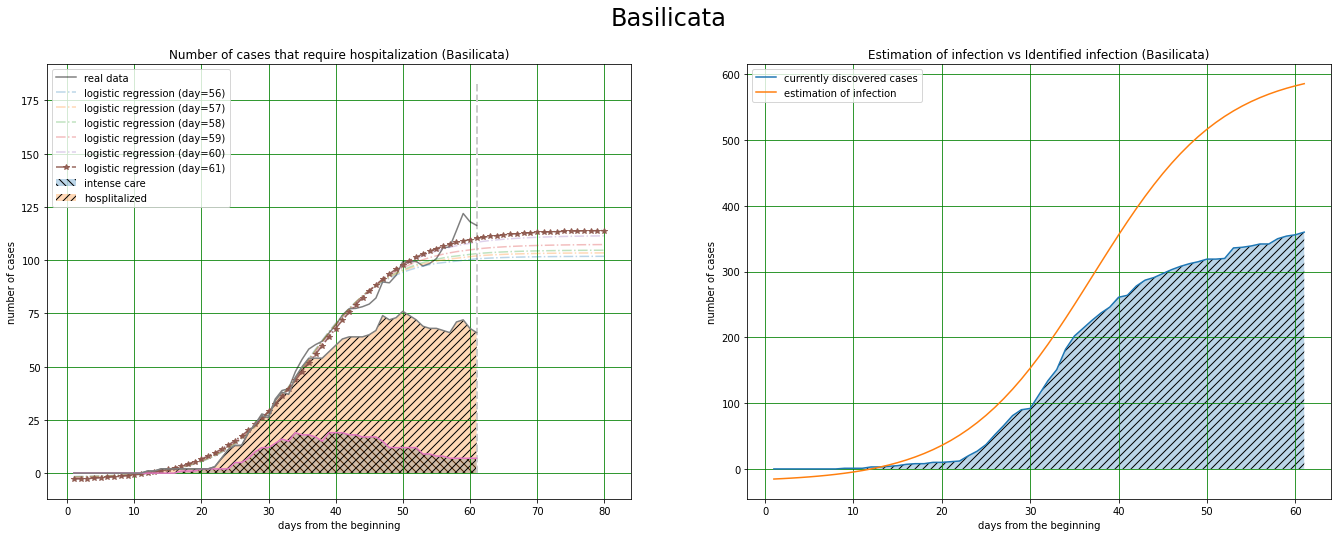

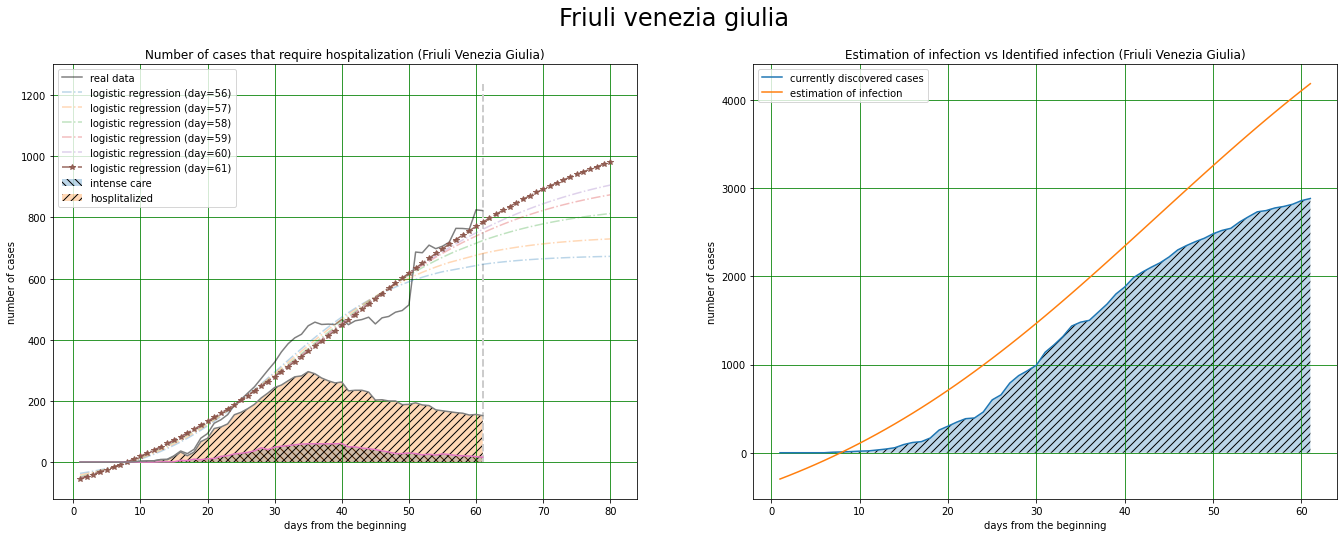

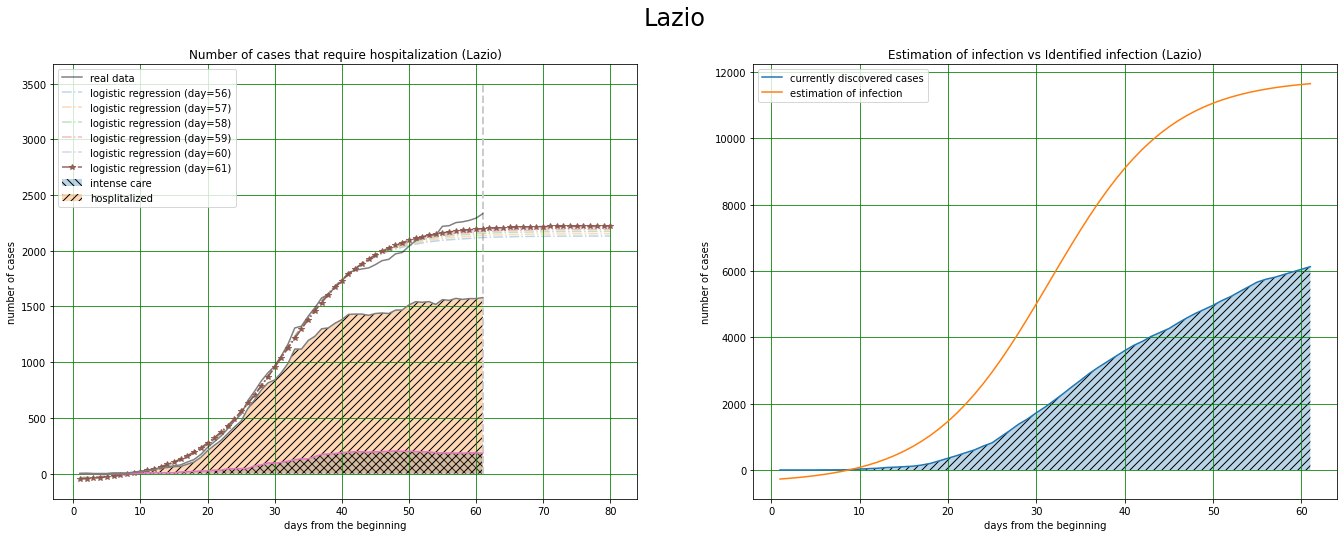

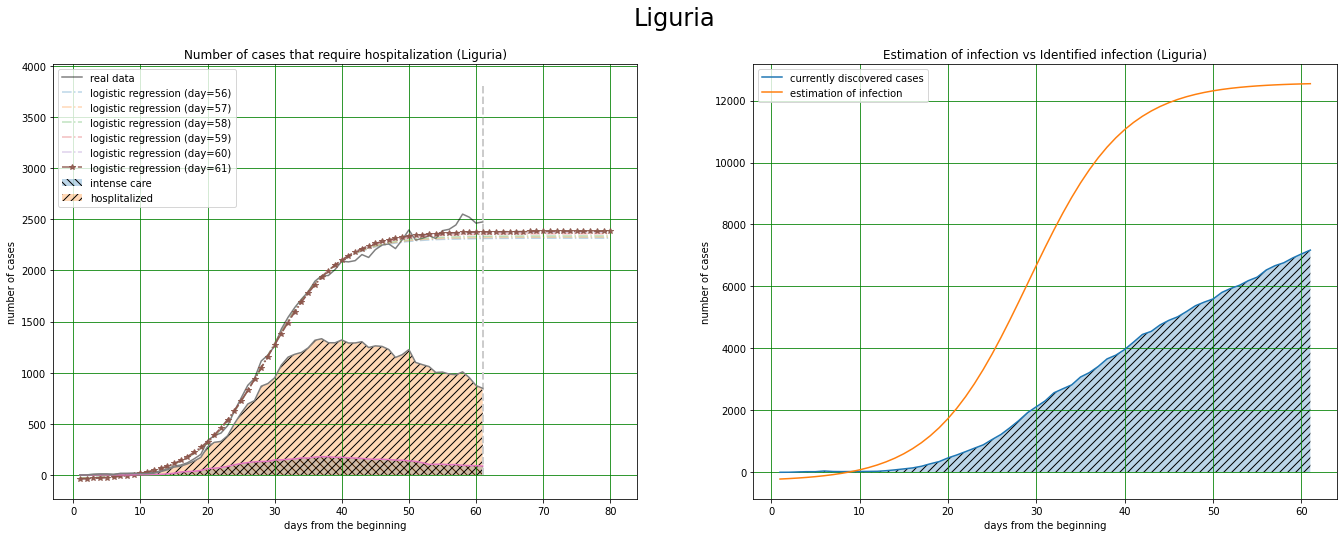

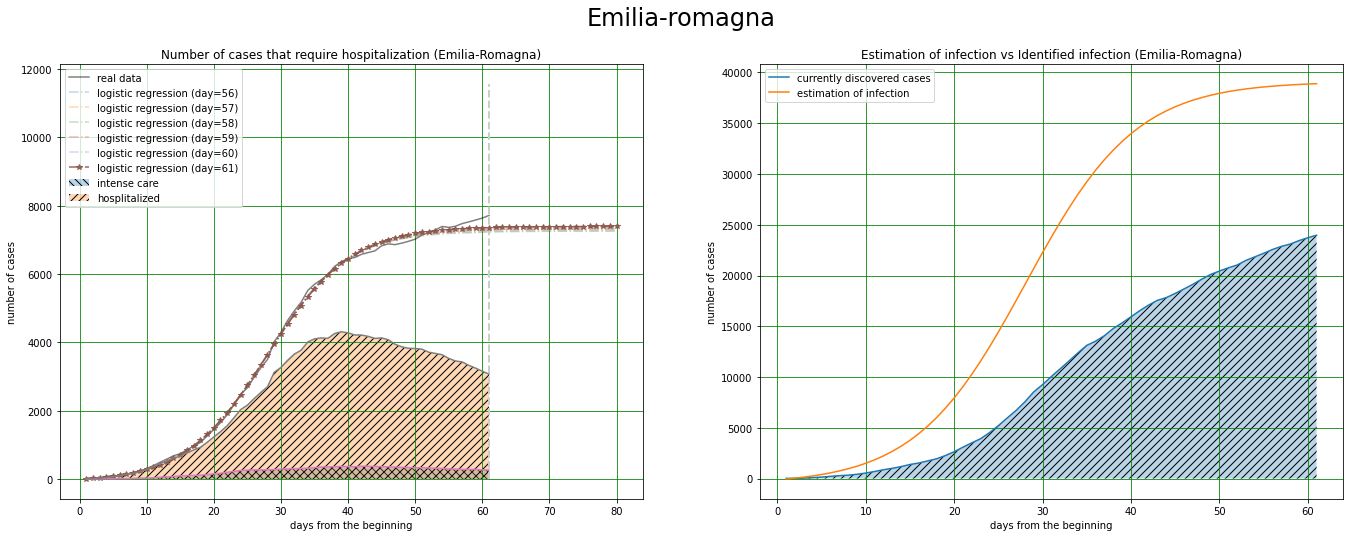

In [9]:
for r in regions:
    pyplot.figure(figsize=[23.0,8.0])
    pyplot.suptitle(r.capitalize(), fontsize=24)
    p1plot = pyplot.subplot(121)
    plot_region(r,6,pxplot=p1plot)
    p2plot = pyplot.subplot(122)
    plot_infection_region(r,pxplot=p2plot)